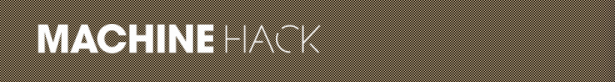

# Satish Patil | satishppatil02@gmail.com

## TITLE: Predicting the Prices of Used Cars


- Driverless cars are getting closer to reality and at a faster pace than ever. But it is still a bit far fetched dream to have one in your garage. For the time being, there are still a lot of combustion and hybrid cars that roar around the road, for some it chills. Though the overall data on sales of automobiles shows a huge drop in sales in the last couple of years, cars are still a big attraction for many. Cars are more than just a utility for many. They are often the pride and status of the family. We all have different tastes when it comes to owning a car or at least when thinking of owning one.


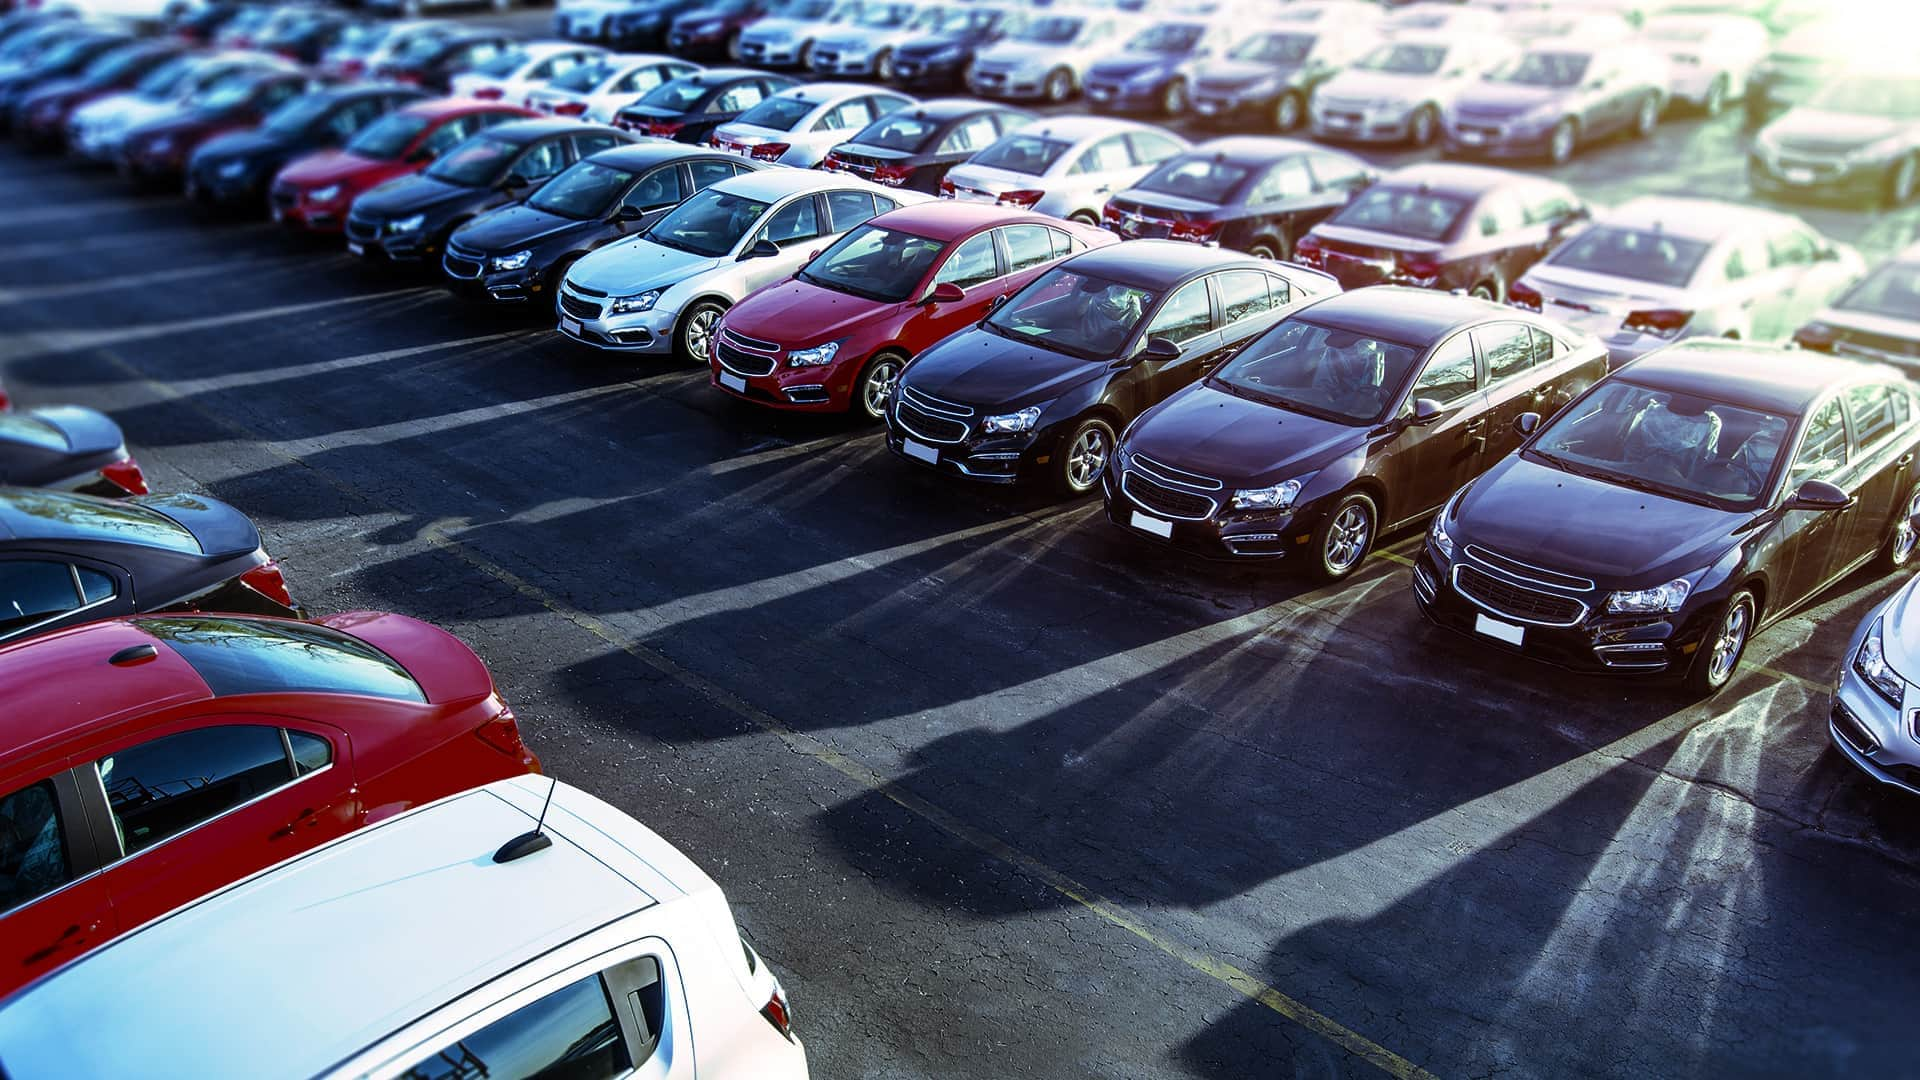

### Index

- Problem Statement
- Business Understanding
- Data Exploration
- Data Cleaning
- Data Visualization
- Model Building
- Model EValuation

### Problem Statement 

- AIM: To predict the price of used cars based on the previous data obtained from scraping several sources


### 1. Business Solutions & Understanding

- Companies can restrict the selling price of used car being posted by customer in their respective websites.
- Companies can provide a visualization to customers for better understanding of their car selling price.
- Companies can have Fraud Customers who are posting the cars for higher prices.
- Companies can expand its network based on the amount of cars being sold the next year by prediction.

### 2. Data Exploration

In [15]:
#Importing Libraries
import warnings #To avoid warnings based on versions updating
warnings.filterwarnings('ignore')
import numpy as np #For numerical analysis
import pandas as pd #For reading data stored in various file formats
import matplotlib.pyplot as plt  #For visualizations
import seaborn as sns #For Special Visualizations and insights

In [17]:
# Let's open the training Data excel file
car_data= pd.read_excel("C:/Users/Satish/Downloads/Data_Train.xlsx")

In [19]:
car_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [24]:
#Information of Data
print("*"*50)
print(car_data.info())
print("*"*50)

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB
None
**************************************************


- Almost of the data is stored as objects and only 2 columns of data is stored in Integers
- Data Cleaning might play a major role in our model building

In [27]:
# Checking Null Values
print("*"*50)
print(car_data.isnull().sum())
print("*"*50)

**************************************************
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
**************************************************


<AxesSubplot:>

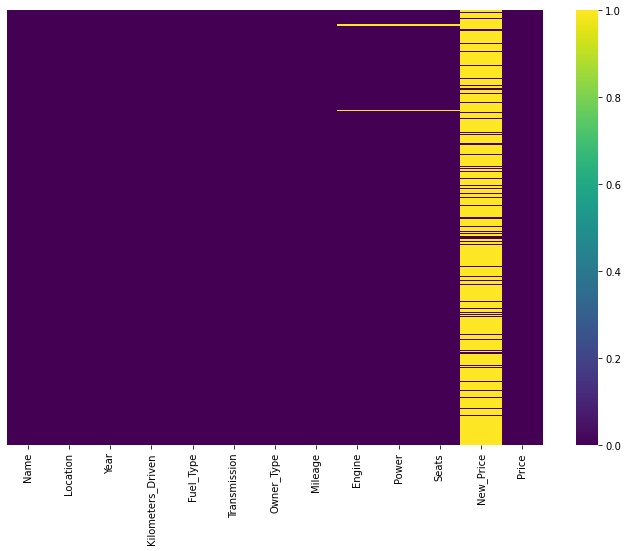

In [29]:
#Visualizing missing values using Seaborn
plt.figure(figsize=(12,8))
sns.heatmap(car_data.isnull(), cmap='viridis', yticklabels=False)


- We can see that New_Price column values are missing in very high amount and we can drop the column for a cleaner data
- The remaining values can be replaced by imputation.

## 03. Data Cleaning

- In our current project data cleaning plays a major role due to the type of data is used


In [ ]:
# Dropping New_Price column from both training data
df.drop(labels=['New_Price'], axis=1, inplace=True) #------> Training Data

In [ ]:
# Drop the NA Values from Training Data
car_data.dropna(inplace=True)
car_data.reset_index(inplace=True)

In [58]:
car_data.columns

Index(['index', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [63]:
# Let's look at the data in Name column to do further modifications
car_data['Name'][:5]

0              Maruti Wagon R LXI CNG
1    Hyundai Creta 1.6 CRDi SX Option
2                        Honda Jazz V
3                   Maruti Ertiga VDI
4     Audi A4 New 2.0 TDI Multitronic
Name: Name, dtype: object

In [82]:
# We can see that the names are starting with Brand names and then the model name followed by some of its specification
# Lets clean the data so that we can store Brand and Model name of cars in a seperate column
car_data['Brand']= car_data['Name'].apply(lambda x:x.split(" ")[0])
car_data['Model_Name']= car_data['Name'].apply(lambda x: " ".join(x.split(" ")[1:]))

In [84]:
# Drop the Name column after adding the columns
car_data.drop(labels=['Name'], axis=1, inplace=True)


In [87]:
car_data.columns

Index(['index', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model_Name'],
      dtype='object')

In [91]:
car_data = car_data[['Brand', 'Model_Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
         'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [100]:
# Column ------> Mileage
car_data['Mileage'][:5]

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [102]:
# Extract the numerical from the object data using split commands in both training data
car_data['Mileage'] = car_data['Mileage'].apply(lambda x: str(x.split(" ")[0]))
car_data['Engine'] = car_data['Engine'].apply(lambda x: str(x.split(" ")[0]))
car_data['Power'] = car_data['Power'].apply(lambda x: str(x.split(" ")[0]))

In [104]:
# Let's look at the dataframes
car_data.head(2)

,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50


### - While cleaning the Power Data I have found some values were entered as "null bhp" so we have to obtain the df where the values are not null

In [109]:
car_data = car_data[car_data['Power'] != 'null']

In [115]:
# Extract the numerical from the object data using split commands in both training data
car_data['Mileage'] = car_data['Mileage'].apply(lambda x: float(x))
car_data['Engine'] = car_data['Engine'].apply(lambda x: float(x))
car_data['Power'] = car_data['Power'].apply(lambda x: float(x))

<AxesSubplot:xlabel='Kilometers_Driven'>

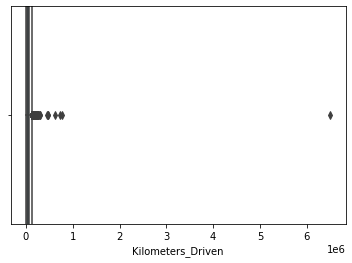

In [123]:
sns.boxplot(car_data['Kilometers_Driven'],width= 2.1)

In [144]:
# Clean the top outliers
for i in np.arange(50):
    index = car_data[car_data['Kilometers_Driven'] == car_data['Kilometers_Driven'].max()].index
    car_data.drop(index=index, inplace=True, axis=1)
car_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Kilometers_Driven'>

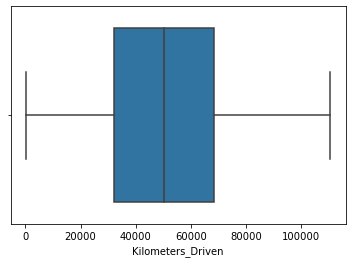

In [150]:
sns.boxplot(car_data['Kilometers_Driven'])

<AxesSubplot:xlabel='Engine'>

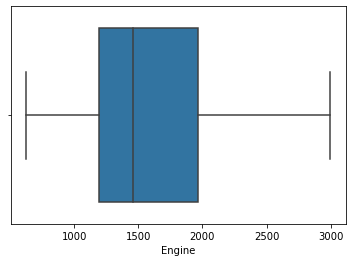

In [151]:
sns.boxplot(car_data['Engine'])

In [154]:
# Clean the top outliers
for i in np.arange(7):
    index = car_data[car_data['Engine'] == car_data['Engine'].max()].index
    car_data.drop(index=index, inplace=True, axis=1)

<AxesSubplot:xlabel='Engine'>

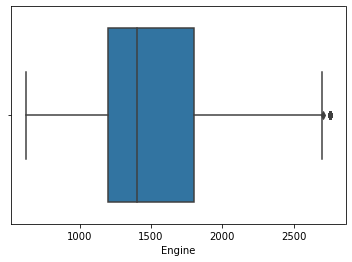

In [156]:
sns.boxplot(car_data['Engine'])

<AxesSubplot:xlabel='Power'>

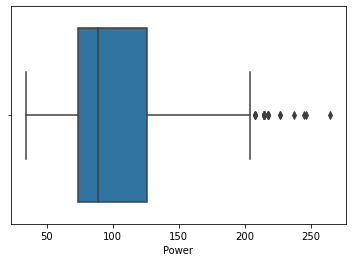

In [158]:
sns.boxplot(car_data['Power'])

In [167]:
# Clean the top outliers
for i in np.arange(25):
    index = car_data[car_data['Power'] == car_data['Power'].max()].index
    car_data.drop(index=index, inplace=True, axis=1)

<AxesSubplot:xlabel='Power'>

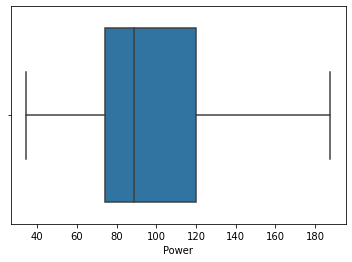

In [168]:
sns.boxplot(car_data['Power'])

### 04. Data Visualization

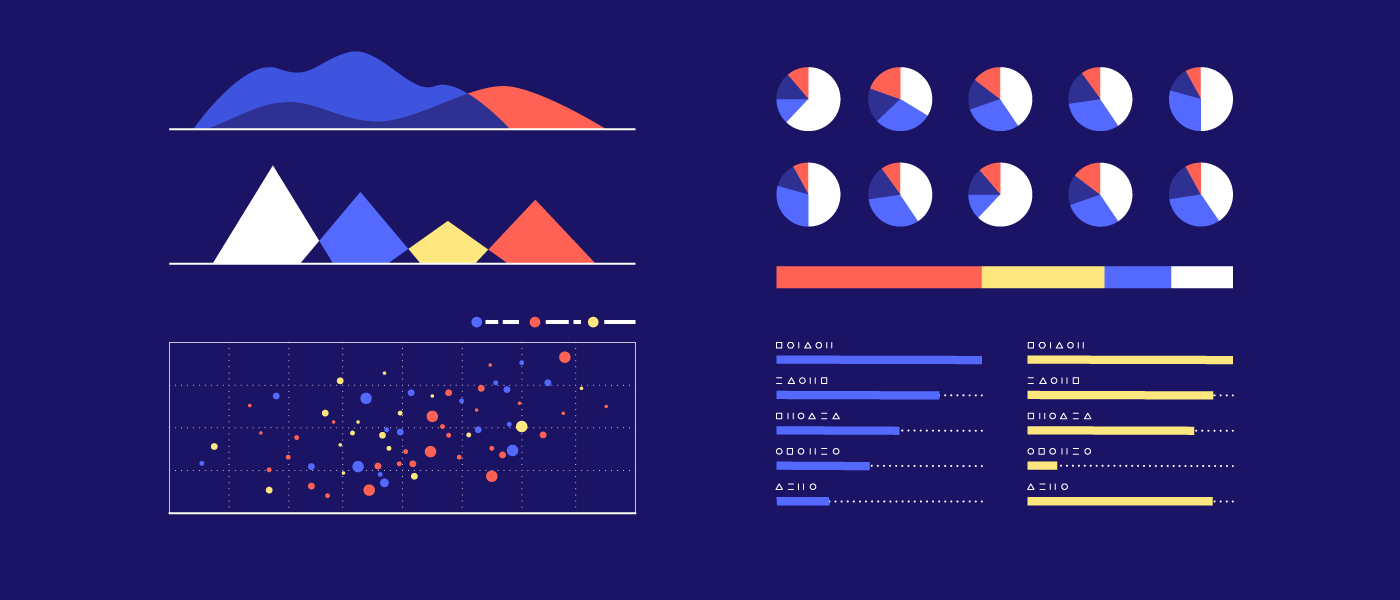

In [171]:
car_data.head(5)

,level_0,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


<AxesSubplot:>

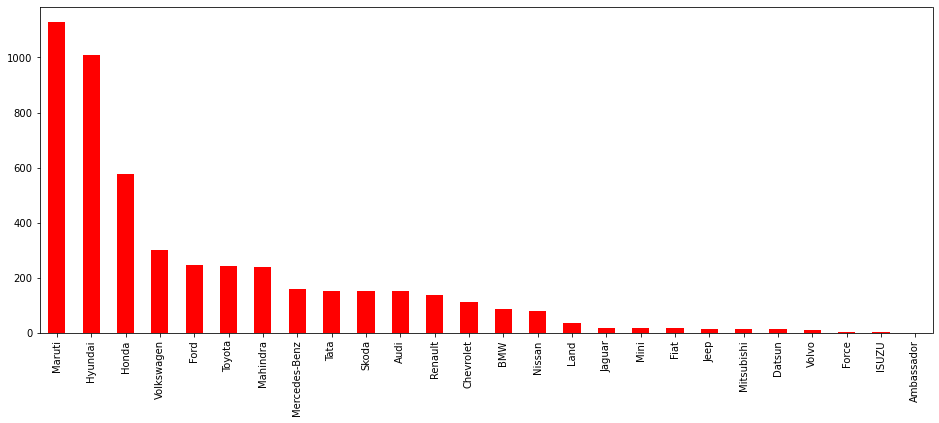

In [182]:
# Let us look at the top brands
plt.figure(figsize=(16,6))
pd.value_counts(car_data['Brand']).plot.bar(color= 'r')


### - Maruti, Hyundai & Honda tops the list as most selling cars


<AxesSubplot:>

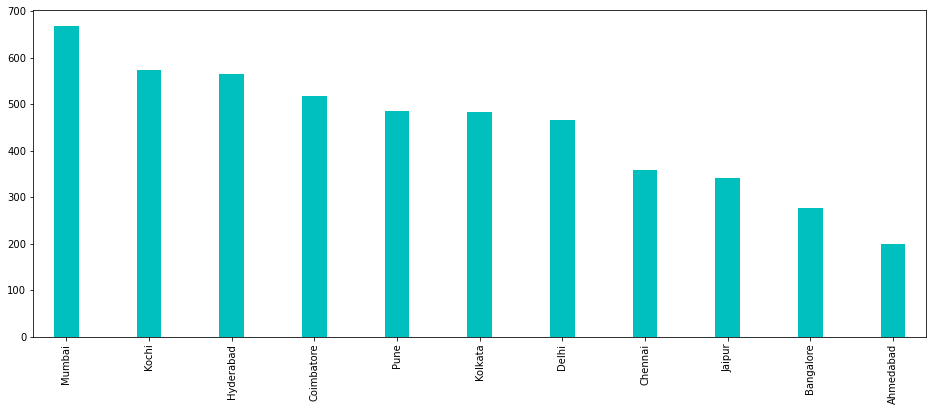

In [183]:
# Let us look at the Location where cars most sold
plt.figure(figsize=(16,6))
pd.value_counts(car_data['Location']).plot.bar(color='c', width=0.3)

### - Most of the Used cars are being sold in Mumbai, Hyderabad and Kochi


<AxesSubplot:>

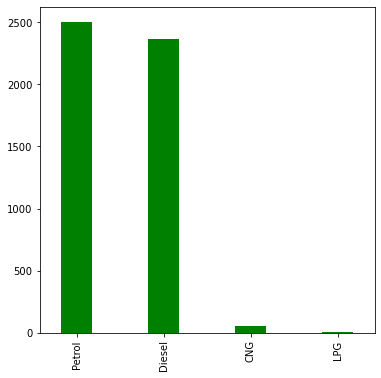

In [185]:
# Let us look at the fuel type
plt.figure(figsize=(6,6))
pd.value_counts(car_data['Fuel_Type']).plot.bar(color='g', width = 0.35)

### - Most of the are Diesel and Petrol only


<AxesSubplot:>

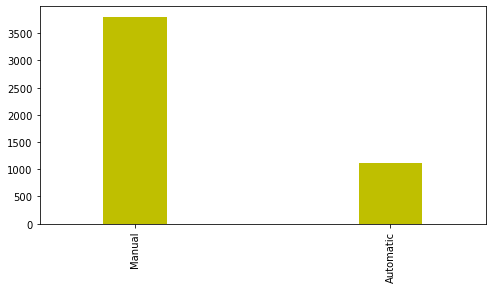

In [186]:
# Let us look at the Transmission type
plt.figure(figsize=(8,4))
pd.value_counts(car_data['Transmission']).plot.bar(color='y', width = 0.25)

<AxesSubplot:>

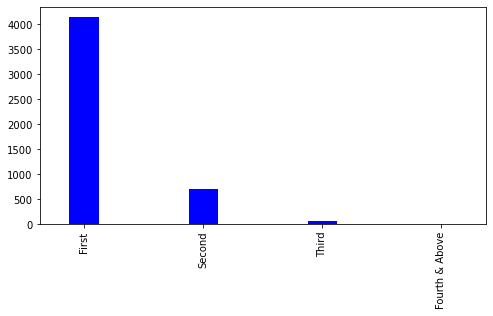

In [187]:
# Let us look at the Owner type
plt.figure(figsize=(8,4))
pd.value_counts(car_data['Owner_Type']).plot.bar(color='b', width = 0.25)

### - Most of the sold cars are first hand cars.


In [188]:
car_data.drop(labels=['level_0'], axis=1, inplace=True)

In [201]:
car_data.head()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,15,1330,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,1,9,374,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,8,743,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50
3,3,15,502,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,4,1,48,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


## 05. Model Building

In [190]:
# Convert the categorical data info numerical categories for machine to understand using LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [191]:
car_data.columns

Index(['index', 'Brand', 'Model_Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [192]:
encoder = LabelEncoder()

In [194]:
# Encode the categorical columns of training data
car_data['Brand'] = encoder.fit_transform(car_data['Brand'])
car_data['Model_Name'] = encoder.fit_transform(car_data['Model_Name'])
car_data['Location'] = encoder.fit_transform(car_data['Location'])
car_data['Owner_Type'] = encoder.fit_transform(car_data['Owner_Type'])
car_data['Fuel_Type'] = encoder.fit_transform(car_data['Fuel_Type'])
car_data['Transmission'] = encoder.fit_transform(car_data['Transmission'])


In [197]:
car_data.head()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,15,1330,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,1,9,374,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,8,743,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50
3,3,15,502,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,4,1,48,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [198]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4929 entries, 0 to 5447
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              4929 non-null   int64  
 1   Brand              4929 non-null   int64  
 2   Model_Name         4929 non-null   int64  
 3   Location           4929 non-null   int64  
 4   Year               4929 non-null   int64  
 5   Kilometers_Driven  4929 non-null   int64  
 6   Fuel_Type          4929 non-null   int64  
 7   Transmission       4929 non-null   int64  
 8   Owner_Type         4929 non-null   int64  
 9   Mileage            4929 non-null   float64
 10  Engine             4929 non-null   float64
 11  Power              4929 non-null   float64
 12  Seats              4929 non-null   float64
 13  Price              4929 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 577.6 KB


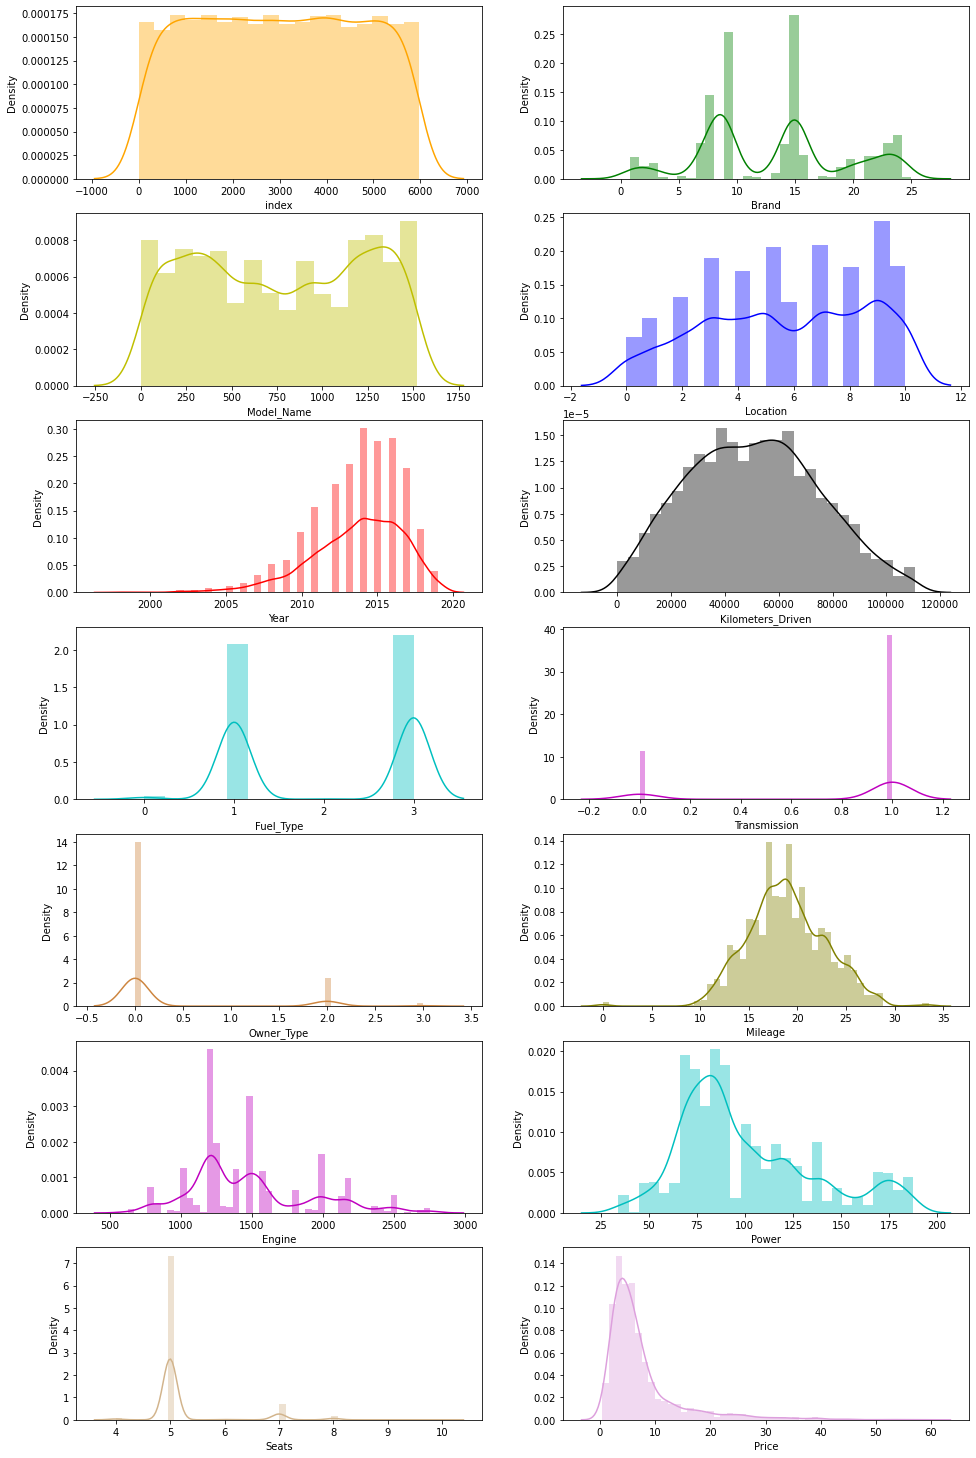

In [200]:
# Let us check the distribution graphs for our data

plt.figure(figsize=(16,26))
c = ['r','Orange','g','y','b','r','k','c','m', 'peru', 'olive', 'm', 'c', 'tan', 'plum']
for i in np.arange(1,15):
    plt.subplot(7,2,i)
    sns.distplot(car_data[car_data.columns[i-1]], color=c[i])

### Data Insights

<AxesSubplot:>

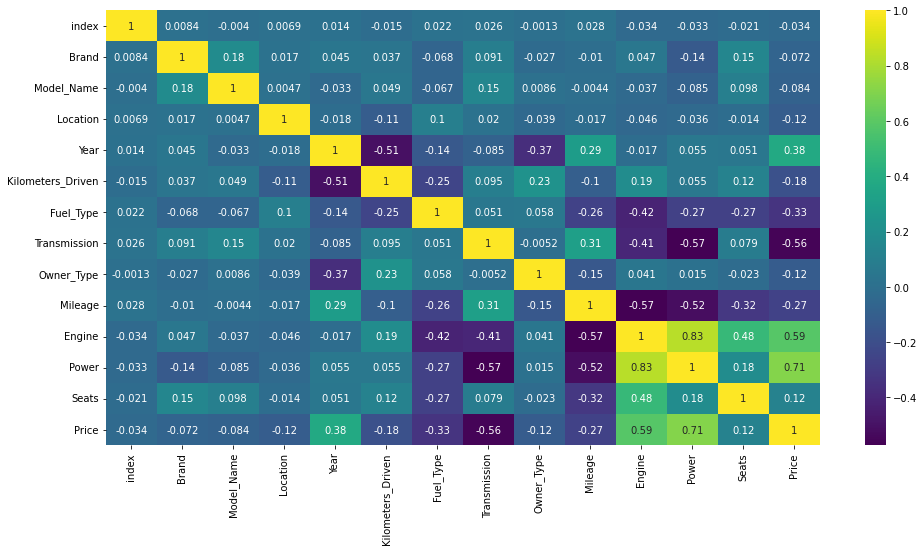

In [202]:
# Correlation between the data columns in training data
plt.figure(figsize=(16,8))
sns.heatmap(car_data.corr(), annot=True, cmap='viridis')

- We can see that price is highly related with
  - Year
  - Engine
  - Power

In [204]:
# Let us define the Dependent & Independent variables to train our model
X = car_data.drop(labels=['Price', 'Model_Name', 'Transmission'], axis=1)
# Dropping transmission because it is completely negatively corelated to price
y = car_data['Price']

In [205]:
X.columns

Index(['index', 'Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [206]:
X = X.iloc[:,1:]

In [208]:
X.columns

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [215]:
# Scale the data to achieve accurate training results.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [220]:
model = RandomForestRegressor(n_estimators=100)

In [221]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [222]:
y_pred = model.predict(X_test)

In [223]:
# R2_Score of our Model
r2_score(y_test, y_pred)

0.9207744334921485

In [225]:
# Let us create an Accuracy function to define our model accuracy
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [227]:
score(y_test, y_pred)

0.9286796726878644